# Sentiment-Based Product Recommendation System

## Objective
The goal of this project is to build a **sentiment-driven product recommendation system** for the e-commerce company **Ebuss**.  
The system recommends products to users based on their past reviews and ratings, then filters these recommendations using sentiment analysis to ensure that only products with strong positive sentiment are suggested.  
The project aims to enhance user satisfaction, improve purchase likelihood, and maintain a competitive edge in the e-commerce market.

---

## Steps Performed

### 1. Data Preprocessing
- Loaded the dataset (`sample30.csv`) containing **30,000 reviews**, **200+ products**, and **20,000+ users**.
- Performed initial exploration (`df.head()`, `df.info()`, `df.describe()`).
- Checked for **missing values** and handled them appropriately.
- Removed duplicate entries to ensure data quality.

---

### 2. Exploratory Data Analysis (EDA)
- **User Sentiment Distribution**: Plotted the proportion of positive and negative sentiments using count plots.
- **Ratings Distribution**: Analyzed and visualized the spread of `reviews_rating` scores.
- **Brand Analysis**:
  - Counted the number of unique brands in the dataset.
  - Identified **top 10 brands** with the highest positive sentiment counts.
  - Identified **top 10 brands** with the highest negative sentiment counts.
- **User Activity**: Listed the top 10 most active reviewers based on the number of reviews submitted.
- Insights from EDA helped in understanding sentiment trends, brand performance, and rating patterns.

--- 

### 3. Text Preprocessing
- Converted all review text to **lowercase**.
- Removed **HTML tags, punctuation, numbers, and extra whitespace**.
- Tokenized text using **NLTK’s word_tokenize**.
- Removed **stopwords** from the text.
- Performed **lemmatization** using NLTK’s `WordNetLemmatizer`.
- Created a cleaned review column for further feature extraction.

---

### 4. Feature Extraction
- Used **TF-IDF Vectorization** to convert cleaned text into numerical features.
- Experimented with different `max_features` and `ngram_range` parameters to optimize representation.

---

### 5. Sentiment Classification Models
- Trained **five machine learning models**:
  1. Logistic Regression  
  2. Naive Bayes 
  3. Decision Trees 
  4. Random Forest
  5. XG Boost
- Addressed **class imbalance** using **SMOTE oversampling**.
- Performed **hyperparameter tuning** with `RandomizedSearchCV`for **three machine learning models**:
  1. Logistic Regression  
  2. Random Forest  
  3. XGBoost  
- Evaluated models using:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - ROC-AUC
- Selected the **best performing model** based on evaluation metrics.

---

### 6. Recommendation System
- Implemented **User-Based Collaborative Filtering** and **Item-Based Collaborative Filtering**.
- Chose the best approach based on RMSE and recommendation relevance.
- Generated **top 20 product recommendations** for each user using the chosen recommendation algorithm.

---

### 7. Fine-Tuning the Recommendation System and Recommendation of Top 5 Products
- Retrieved the reviews for the **top 20 recommended products**.
- Used the **sentiment classification model** to predict sentiment scores for these reviews.
- Filtered down to the **top 5 products** with the highest positive sentiment for final recommendations.

---

### 8. Conclusion & Insights
- Successfully built an **integrated recommendation pipeline** combining collaborative filtering with sentiment analysis.
- Improved recommendation quality by ensuring products have **both high predicted relevance and positive sentiment**.
- The final system is ready for **deployment** with a user interface to deliver real-time recommendations.

### ***1. Data Preprocessing***

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, nltk, string
import pickle
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import SMOTE
import logging
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics.pairwise import pairwise_distances

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pranav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pranav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pranav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\pranav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [3]:
# Importing the data
data = pd.read_csv('data/sample30.csv')
data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
# Checking the shape of the dataset
data.shape

(30000, 15)

In [5]:
# Checking the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# Null Value check
data.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [7]:
# Removing the missing rows of user_sentiment
data = data[~data.user_sentiment.isnull()]

In [8]:
# Mapping the categorical user_sentiment to numerical 1 or 0 for modelling
data['user_sentiment'] = data['user_sentiment'].map({'Positive':1,'Negative':0})

In [9]:
# Getting the value count of user_sentiments column
data["user_sentiment"].value_counts(normalize=True)

1    0.887763
0    0.112237
Name: user_sentiment, dtype: float64

### ***2. Exploratory Data Analysis (EDA)***

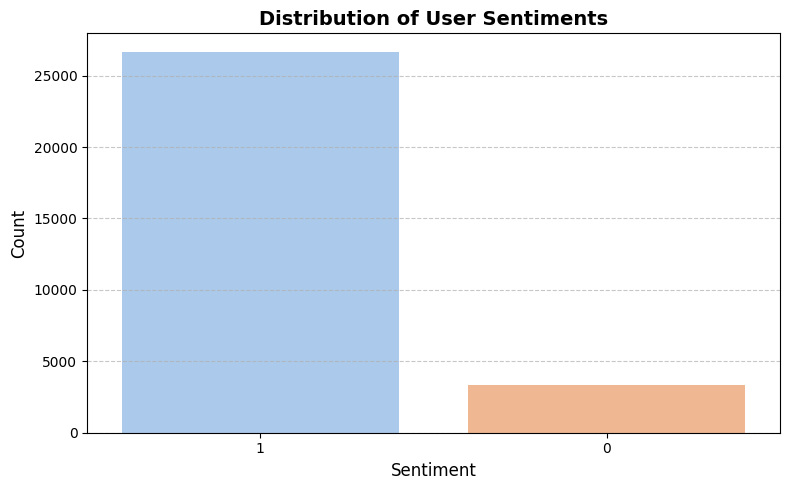

In [10]:
# Visualizing the using count plot to analyze the distribution of User Sentiments
plt.figure(figsize=(8, 5))
sns.countplot(
    x='user_sentiment',
    data=data,
    palette='pastel',   
    order=data['user_sentiment'].value_counts().index 
)
plt.title('Distribution of User Sentiments', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insights from Sentiment Distribution
- The sentiment distribution shows a **strong positive bias**, with approximately **25,000 positive reviews** (sentiment = 1) compared to **~5,000 negative reviews** (sentiment = 0), representing **~89% positive feedback**.  
- This indicates **high overall customer satisfaction**, though the **~11% negative reviews** highlight potential areas for improvement.  
- The class imbalance may require **balancing techniques** (e.g., SMOTE) to improve sentiment model performance.  

In [11]:
# Checking the statistical summary
data["reviews_rating"].describe()

count    29999.000000
mean         4.483116
std          0.988453
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [12]:
# Counting the frequency of each unique rating value in the 'reviews_rating' column
data["reviews_rating"].value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

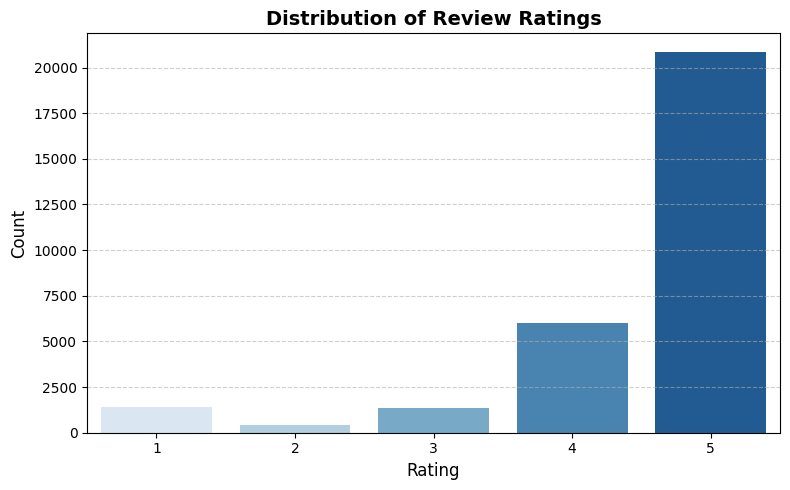

In [13]:
# Creating a count plot to visualize the distribution of review ratings
plt.figure(figsize=(8, 5))
sns.countplot(
    x='reviews_rating',
    data=data,
    palette='Blues',
    order=sorted(data['reviews_rating'].dropna().unique())
)
plt.title('Distribution of Review Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### From the above plot, we can see that most of the ratings from the users have been on the higher side. Most of the review ratings have been 5. This would surely cause a data imbalance as user_sentiment should be in alignment with the ratings. We will check and handle it later on.

In [14]:
# Checking the statistical summary of 'reviews_rating' for reviews with positive user sentiment
data[data["user_sentiment"]==1]["reviews_rating"].describe()

count    26632.000000
mean         4.560378
std          0.865194
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [15]:
# Checking the statistical summary of 'reviews_rating' for reviews with negative user sentiment 
data[data["user_sentiment"]==0]["reviews_rating"].describe()

count    3367.000000
mean        3.871993
std         1.537589
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

In [16]:
# Filtering the data to include only positive user sentiment reviews (user_sentiment == 1) where the review rating is less than 4, and selecting the columns 'reviews_title', 'reviews_text', and 'reviews_rating'
data[(data["user_sentiment"]==1) & (data["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is noth...,1
11,Waste of Money,Purchased this thinking it would have some sor...,1
14,Disappointed,First time purchase of this type of product. M...,1
18,Pretty nice,I bought this because it had better reviews th...,3
54,New formula is terrible,I used (and loved) this product for several ye...,1
...,...,...,...
29050,Didn't Do Much For Dryness,I received this product from Influenster. I ab...,3
29051,Not the best,I used this product for a month straight befor...,3
29053,clay conditioning,Got this item as a compliment from influenster...,3
29054,Eh,I am not in love with the conditioner. The cla...,3


In [17]:
# Filtering the data to include only reviews with neutral or negative user sentiment (user_sentiment == 0) where the review rating is 4 or higher, and select the columns 'reviews_title', 'reviews_text', and 'reviews_rating'
data[(data["user_sentiment"]==0) & (data["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...,4
96,This product has made a real difference on my ...,In only a week I can see the difference in my ...,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and sup...,4
106,Very rich cream,I like to use this cream on my neck and collar...,4
117,Not greasy,I finally found a moisturizing product that wi...,4
...,...,...,...
29818,Great Product,I received a complimentary sample of this prod...,5
29855,Great,This has prolonged the color in my hair! Not o...,5
29858,Makes my hair soft and shiny without excess oil!,This conditioner makes my hair very soft witho...,5
29862,Great Conditioner,This conditioner has become a staple in my hai...,5


In [18]:
# Displaying a table that counts reviews by sentiment and rating,including totals for each row and column
pd.crosstab(data["user_sentiment"], data["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


In [19]:
# Changing user sentiment to 0 for reviews that are originally labeled as 1 (positive sentiment) but have a rating less than 4
data.loc[(data["user_sentiment"]==1) & (data["reviews_rating"]<4), "user_sentiment"] = 0

In [20]:
# Changing user sentiment to 1 for reviews that are originally labeled as 0 (negative sentiment) but have a rating of 4 or higher, updating the sentiment to positive
data.loc[(data["user_sentiment"]==0) & (data["reviews_rating"]>=4), "user_sentiment"] = 1

In [21]:
# Creating a table showing the count of reviews for each combination of user sentiment and review rating,including row and column totals
pd.crosstab(data["user_sentiment"], data["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


##### As per the above results, there looks to be mismatch between review_rating and user_sentiment. there are records that have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive. We can either clean up those records or update the target column to the correct user sentiment, so that will be helpful for modelling. Here, updating the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4

In [22]:
# Checking the number of reviews for each user sentiment category
data["user_sentiment"].value_counts()

1    26850
0     3149
Name: user_sentiment, dtype: int64

In [23]:
# Checking the number of brands
data["brand"].value_counts()

Clorox                   10585
Warner Home Video         3325
Disney                    1199
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: brand, Length: 214, dtype: int64

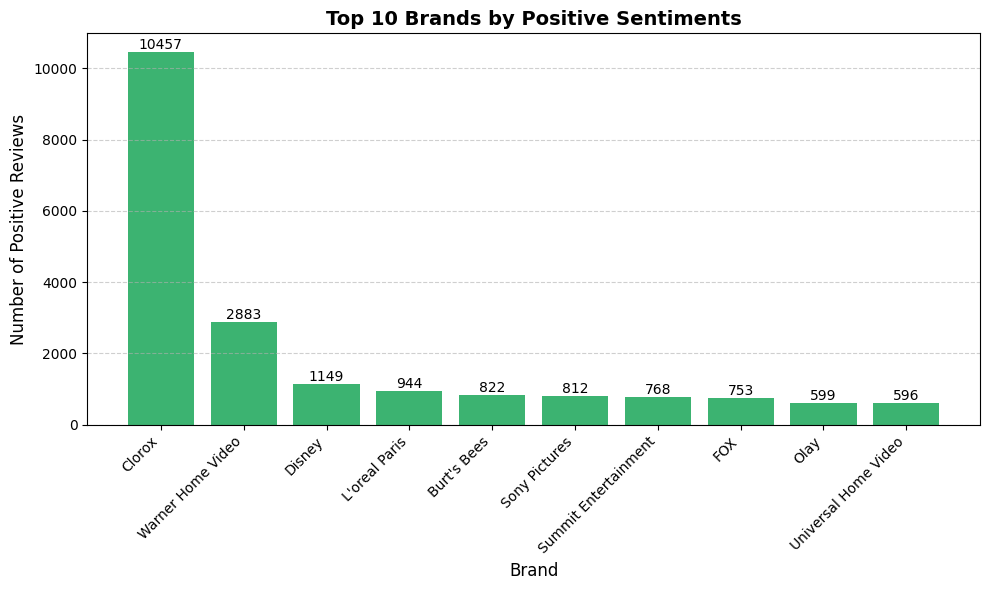

In [24]:
# Top 10 Brands by Positive Sentiments
top_brands = (
    data[data['user_sentiment'] == 1]
    .groupby('brand')
    .size()
    .sort_values(ascending=False)[:10]
)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_brands.index, top_brands.values, color='mediumseagreen')

# Title and axis labels
plt.title('Top 10 Brands by Positive Sentiments', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Positive Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Key Insights from Positive Sentiment Analysis
- **Clorox** dominates with the highest number of positive reviews, far surpassing other brands.  
- **Warner Home Video** is a distant second, followed by **Disney**.  
- All other brands receive comparatively fewer positive reviews.  
- Positive sentiment is heavily concentrated in the top two brands.  

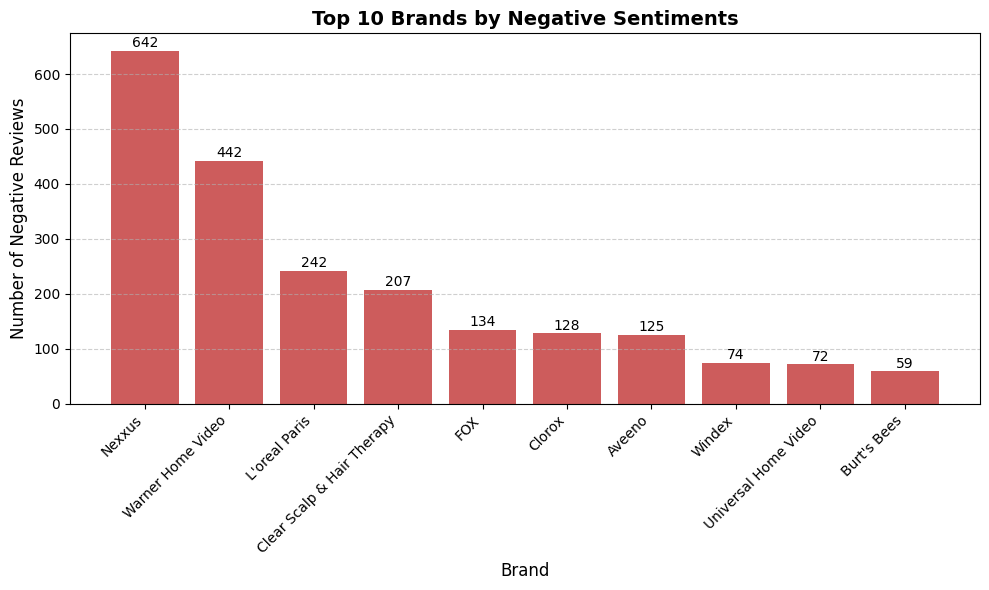

In [25]:
# Filtering and aggregating negative sentiment counts
top_negative_brands = (
    data[data['user_sentiment'] == 0]
    .groupby('brand')
    .size()
    .sort_values(ascending=False)[:10]
)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_negative_brands.index, top_negative_brands.values, color='indianred')

# Title and axes
plt.title('Top 10 Brands by Negative Sentiments', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Negative Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate count values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Key Insights from Negative Sentiment Analysis
- **Nexus** has the highest number of negative reviews, leading by a notable margin.  
- **Warner Home Video** and **L'oreal Paris** follow, but with significantly fewer negative reviews.  
- All other brands show minimal negative sentiment.  
- Negative reviews are primarily concentrated in the top few brands.  

In [26]:
# Returning the number of reviews for a given product (by productId) with a specified user sentiment
def filter_products(productId, pos=1):
    review_count = data[(data.id==productId) & (data.user_sentiment==pos)]['brand'].count()
    return review_count

In [27]:
# Grouping the dataframe by product id and view the # of pos review / neg reviews count
df_custom =  data.groupby('id', as_index=False)['user_sentiment'].count()
df_custom["pos_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 1))
df_custom["neg_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 0))

In [28]:
df_custom.head()

,id,user_sentiment,pos_review_count,neg_review_count
0,AV13O1A8GV-KLJ3akUyj,1,1,0
1,AV14LG0R-jtxr-f38QfS,2,2,0
2,AV16khLE-jtxr-f38VFn,27,10,17
3,AV1YGDqsGV-KLJ3adc-O,348,274,74
4,AV1YIch7GV-KLJ3addeG,1,1,0


In [29]:
# Sorting the product by sentiment % - postive reviews / total number of reviews
df_custom['sentiment %'] = np.round((df_custom['pos_review_count']/df_custom['user_sentiment'])*100,2)
df_custom.sort_values(by='sentiment %', ascending=False)[:20]

,id,user_sentiment,pos_review_count,neg_review_count,sentiment %
0,AV13O1A8GV-KLJ3akUyj,1,1,0,100.0
82,AVpf-lMV1cnluZ0-ub0_,4,4,0,100.0
138,AVpfE5UF1cnluZ0-dY1N,2,2,0,100.0
141,AVpfEqFbilAPnD_xUV28,4,4,0,100.0
143,AVpfErGsLJeJML431yRX,1,1,0,100.0
145,AVpfFGqP1cnluZ0-ddjG,1,1,0,100.0
149,AVpfGRUHilAPnD_xU5nU,5,5,0,100.0
150,AVpfGTRQLJeJML432WYA,8,8,0,100.0
151,AVpfG_ujilAPnD_xVI8L,8,8,0,100.0
153,AVpfH2Rx1cnluZ0-eYtu,3,3,0,100.0


In [30]:
# Checking out the most common users.
data["reviews_username"].value_counts()[:10]

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
Name: reviews_username, dtype: int64

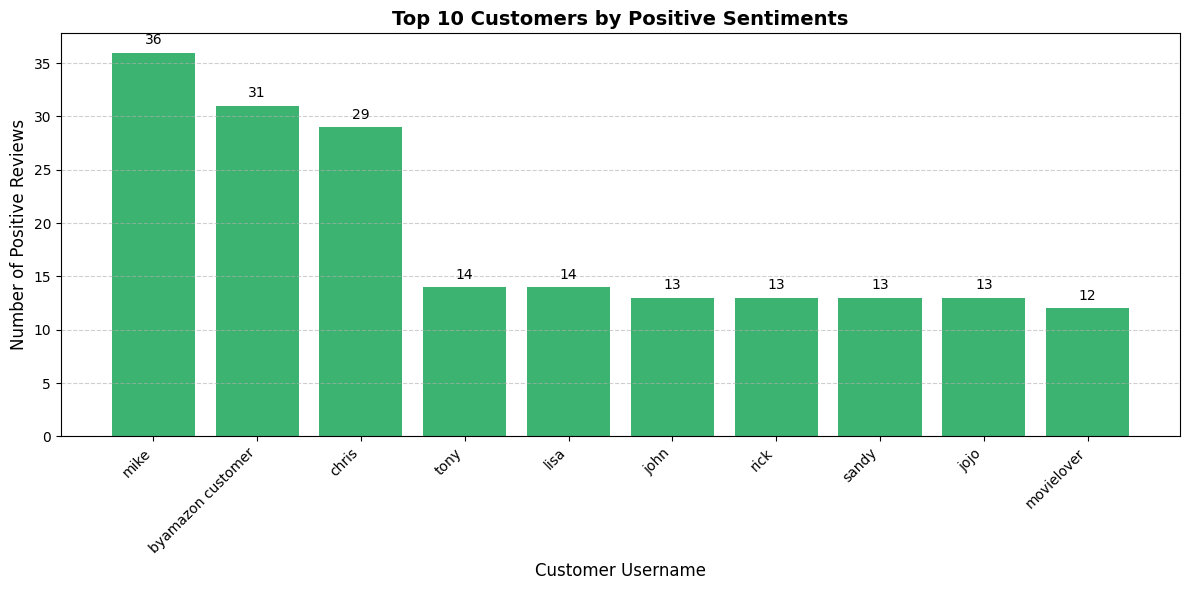

In [31]:
# Aggregating top 10 customers with most positive reviews
top_positive_users = (
    data[data['user_sentiment'] == 1]
    .groupby('reviews_username')
    .size()
    .sort_values(ascending=False)[:10]
)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_positive_users.index, top_positive_users.values, color='mediumseagreen')

# Titles and labels
plt.title('Top 10 Customers by Positive Sentiments', fontsize=14, fontweight='bold')
plt.xlabel('Customer Username', fontsize=12)
plt.ylabel('Number of Positive Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### This column **reviews_username** is an important component for our analysis as it contains the unique identification for individual user in the dataset. Since the NULL percentage is only 0.20%, we will remove these rows from the dataset.

In [32]:
# Removing nan/null from username
data = data[~data.reviews_username.isnull()]

In [33]:
# Calculating the percentage of missing values for each column and sorting them from highest to lowest
(100 * data.isnull().sum() / len(data)).sort_values(ascending=False)

reviews_userProvince    99.445484
reviews_userCity        93.653127
reviews_didPurchase     46.783137
reviews_doRecommend      8.488108
reviews_title            0.631347
manufacturer             0.471005
reviews_date             0.133618
id                       0.000000
brand                    0.000000
categories               0.000000
name                     0.000000
reviews_rating           0.000000
reviews_text             0.000000
reviews_username         0.000000
user_sentiment           0.000000
dtype: float64

- **`reviews_userProvince`** and **`reviews_userCity`** contain over 93% missing values, making them unsuitable for analysis; these columns will be removed.  
- **`reviews_didPurchase`** has over 46% missing values and does not contribute meaningfully to building either the Sentiment Analysis or Recommendation System; this column will also be removed.  

In [34]:
data.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace=True)

In [35]:
# Calculating the percentage of missing values for each column and sorting them from highest to lowest
(100 * data.isnull().sum() / len(data)).sort_values(ascending=False)

reviews_doRecommend    8.488108
reviews_title          0.631347
manufacturer           0.471005
reviews_date           0.133618
id                     0.000000
brand                  0.000000
categories             0.000000
name                   0.000000
reviews_rating         0.000000
reviews_text           0.000000
reviews_username       0.000000
user_sentiment         0.000000
dtype: float64

In [36]:
data.reviews_doRecommend.value_counts(normalize=True)

True     0.94342
False    0.05658
Name: reviews_doRecommend, dtype: float64

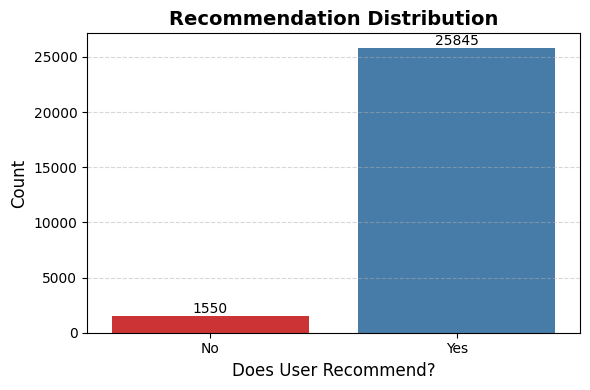

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='reviews_doRecommend',
    data=data,
    palette='Set1'
)

# Title and labels
plt.title('Recommendation Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Does User Recommend?', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate counts on bars
counts = data['reviews_doRecommend'].value_counts()
for i, count in enumerate(counts.sort_index()):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Looking at the distribution of reviews_doRecommend column, we can see that more than 94% of the data is having True value. Hence, the column does not provide any useful information for the model to learn. We will drop this field

In [38]:
data.drop(columns=['reviews_doRecommend'], inplace=True)

In [39]:
# Calculating the percentage of missing values for each column and sorting them from highest to lowest
(100 * data.isnull().sum() / len(data)).sort_values(ascending=False)

reviews_title       0.631347
manufacturer        0.471005
reviews_date        0.133618
id                  0.000000
brand               0.000000
categories          0.000000
name                0.000000
reviews_rating      0.000000
reviews_text        0.000000
reviews_username    0.000000
user_sentiment      0.000000
dtype: float64

In [40]:
data.drop(columns=['categories', 'manufacturer', 'reviews_date'], inplace=True)

##### Dropping off **categories**, **manufacturer**, **reviews_date** columns as they are unnecessary for our task

In [41]:
# Calculating the percentage of missing values for each column and sorting them from highest to lowest
(100 * data.isnull().sum() / len(data)).sort_values(ascending=False)

reviews_title       0.631347
id                  0.000000
brand               0.000000
name                0.000000
reviews_rating      0.000000
reviews_text        0.000000
reviews_username    0.000000
user_sentiment      0.000000
dtype: float64

In [42]:
# Converting all the text columns to string for performing text operations
data['brand'] = data['brand'].astype(str)
data['name'] = data['name'].astype(str)
data['reviews_text'] = data['reviews_text'].astype(str)
data['reviews_title'] = data['reviews_title'].astype(str)
data['reviews_username'] = data['reviews_username'].astype(str)

In [43]:
# Combining the reviews_text and reviews_title for better analysis
data["reviews_title"] = data["reviews_title"].fillna('')
data["reviews_full_text"] = data[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [44]:
data[["reviews_full_text", "user_sentiment"]].sample(10)

,reviews_full_text,user_sentiment
17706,Better than other brands I've tried.. I though...,1
24747,GODZILLA. ITEM WAS IN EXCELLENT CONDITION!!! W...,1
16442,One of my favorite lip products. I absolute ad...,1
25156,Bryan Cranston sets the tone. The craze to reb...,1
17573,"nan. A light, slightly watery product with a c...",1
18530,Great companion to the shampoo!. Love being ab...,1
129,Product smell good. Because they have use some...,1
27712,Great movie. Love the plane movies.. They are ...,1
27276,great. really enjoy these can be very relaxing...,1
11397,Germs gone!. Colorox wipes are so easy to use....,1


In [45]:
# Creating a new DataFrame containing only the columns: 'id', 'name', 'reviews_full_text', and 'user_sentiment'
data_sentiment = data[['id','name', 'reviews_full_text', 'user_sentiment']]
data_sentiment.head()

,id,name,reviews_full_text,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very goo...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected a...,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Disappointed. I read through the reviews on he...,0
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us....,0


In [46]:
data_sentiment.shape

(29936, 4)

### ***3. Text Preprocessing***

In [47]:
'''function to clean the text and remove all the unnecessary elements.'''
def clean_text(text):
    """Clean text by removing unwanted characters, punctuation, numbers, etc."""
    # Converting text to lowercase
    text = text.lower()
    
    # Removing text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Removing punctuation 
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Removing words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Removing extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [48]:
# Applying the 'clean_text' function to each review in 'reviews_full_text' and store the cleaned text in a new column 'reviews_text'
data_sentiment["reviews_text"] = data_sentiment.reviews_full_text.apply(lambda x: clean_text(x))

In [49]:
# Helper function to map NTLK position tags
def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = tag[0].upper() if tag else ''
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [50]:
# Defining stop words for English but keep important negations like 'not', 'never', and 'no'
stop_words = set(stopwords.words('english')) - {"not", "never", "no"}

def remove_stopwords(text):
    """Remove stopwords and non-alphabetic tokens"""
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [51]:
lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemmatize_text(text):
    """Lemmatize text with POS tagging"""
    lemmatizer = WordNetLemmatizer()
    # Tokenize and POS tag
    word_pos_tags = nltk.pos_tag(word_tokenize(text))
    # Lemmatize each word with proper POS tag
    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag))
        for word, pos_tag in word_pos_tags
    ]
    return " ".join(lemmatized_words)

In [52]:
# Applying the 'lemmatize_text' function to each review in 'reviews_full_text'and store the lemmatized version of the text in a new column 'reviews_cleaned'
data_sentiment["reviews_cleaned"] = (data_sentiment["reviews_full_text"].apply(lemmatize_text))

In [53]:
data_sentiment.head()

,id,name,reviews_full_text,user_sentiment,reviews_text,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very goo...,1,just awesome i love this album its very good m...,Just Awesome . i love this album . it 's very ...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected a...,1,good good flavor this review was collected as ...,Good . Good flavor . This review be collect a ...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,Good . Good flavor .
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Disappointed. I read through the reviews on he...,0,disappointed i read through the reviews on her...,Disappointed . I read through the review on he...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us....,0,irritation my husband bought this gel for us t...,Irritation . My husband buy this gel for u . T...


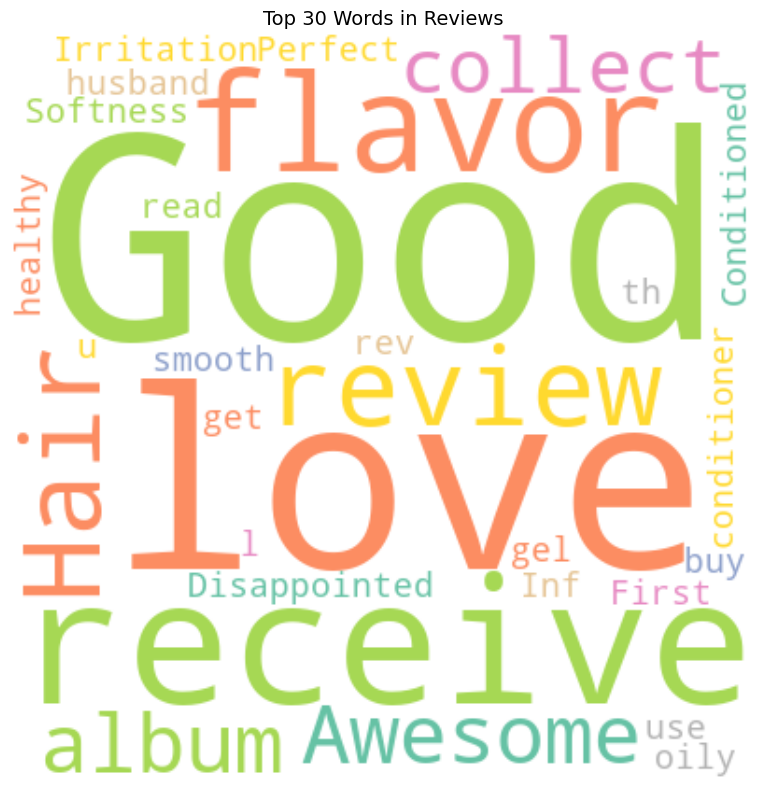

In [54]:
# Using a word cloud find the top 30 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(
    stopwords=stop_words,
    max_words=30,
    background_color='white',
    colormap='Set2',
    width=400,
    height=400,
    random_state=42
).generate(str(data_sentiment['reviews_cleaned']))

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 30 Words in Reviews', fontsize=14)
plt.tight_layout()
plt.show()

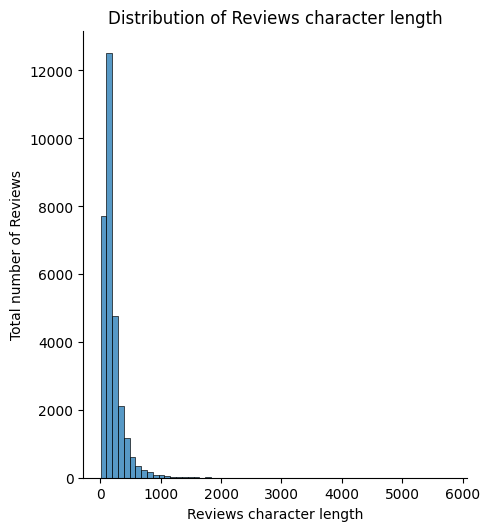

In [55]:
# Visualizing 'reviews_cleaned' character length
character_length = [len(each_sent) for each_sent in data_sentiment['reviews_cleaned']]

sns.displot(character_length, kind='hist', bins=60)
plt.xlabel("Reviews character length")
plt.ylabel("Total number of Reviews")
plt.title("Distribution of Reviews character length")
plt.show()

In [56]:
def getMostCommonWords(reviews, n_most_common):
    # Flattening review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in \
                         review.lower().split()]


    # Removing punctuation from reviews
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]


    # Removing any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [57]:
positive_reviews = data_sentiment[data_sentiment['user_sentiment'] == 1]

for word, freq in getMostCommonWords(positive_reviews['reviews_cleaned'], 10):
    print(f"{word:<15} {freq}")

a               38378
be              37875
the             36590
i               34514
and             29324
this            24488
it              22701
to              20233
of              19162
my              15251


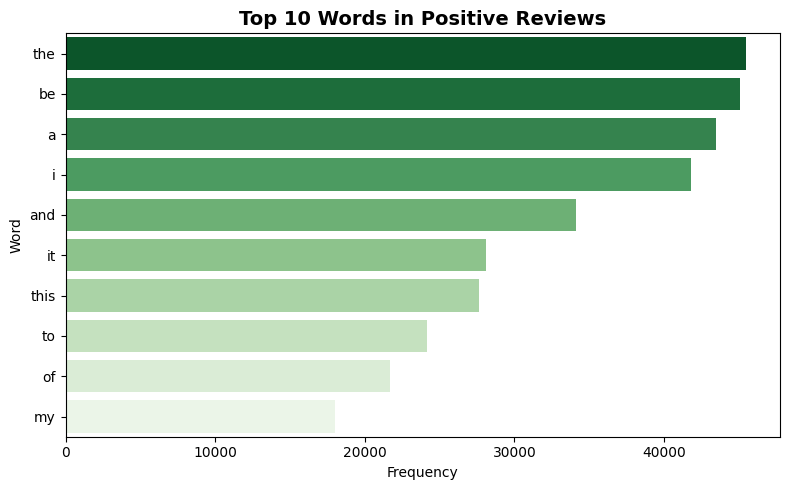

In [58]:
most_common_words_in_positive_reviews = getMostCommonWords(data_sentiment['reviews_cleaned'], 10)

# Converting to DataFrame
df_common = pd.DataFrame(most_common_words_in_positive_reviews, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Frequency', y='Word', data=df_common, palette='Greens_r')
plt.title('Top 10 Words in Positive Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [59]:
# Getting negative reviews and print top 10 common words with frequency
negative_reviews = data_sentiment[data_sentiment['user_sentiment'] == 0]

for word, freq in getMostCommonWords(negative_reviews['reviews_cleaned'], 10):
    print(f"{word:<15} {freq}")

the             8890
i               7308
be              7175
it              5403
a               5086
and             4771
to              3902
this            3154
my              2784
have            2750


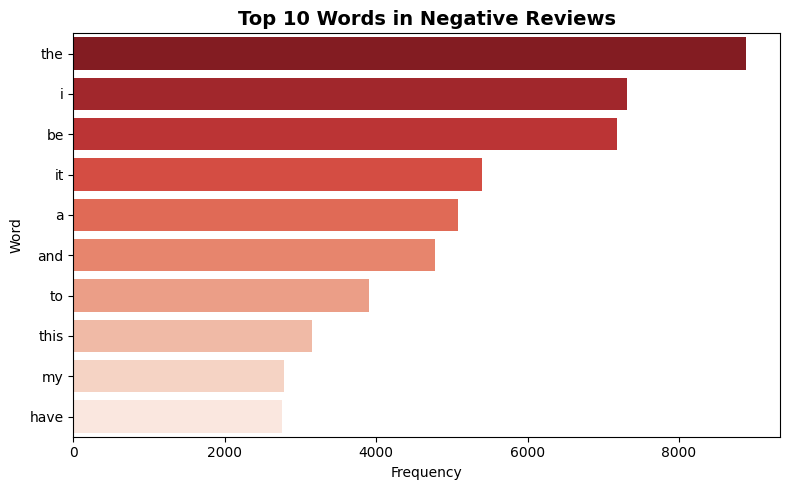

In [ ]:
# Creating a DataFrame of the 10 most common words in negative reviews with their frequencies,then plotting a horizontal bar chart showing these words and their counts in a red color palette
most_common_words_in_negative_reviews = getMostCommonWords(negative_reviews['reviews_cleaned'], 10)
df_common_neg = pd.DataFrame(most_common_words_in_negative_reviews, columns=['Word', 'Frequency'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Frequency', y='Word', data=df_common_neg, palette='Reds_r')
plt.title('Top 10 Words in Negative Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [61]:
# Extracting the top 'n' most frequent n-grams of a specified length from a text corpus,ignoring English stop words
def get_top_n_ngram(corpus, n_gram_range, n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

In [62]:
# Getting top 10 bigrams from positive reviews
positive_reviews_common_bigrams = get_top_n_ngram(positive_reviews['reviews_cleaned'], 2, 10)

# Converting to DataFrame and label columns
df_common_bigrams = pd.DataFrame(positive_reviews_common_bigrams, columns=['Bigram', 'Frequency'])

# Display
print(df_common_bigrams)

              Bigram  Frequency
0     review collect       8372
1  collect promotion       8372
2        clorox wipe       2102
3      great product       1941
4        great movie       1732
5           easy use       1586
6        love clorox       1220
7       love product       1140
8         use clorox       1079
9         good movie        929


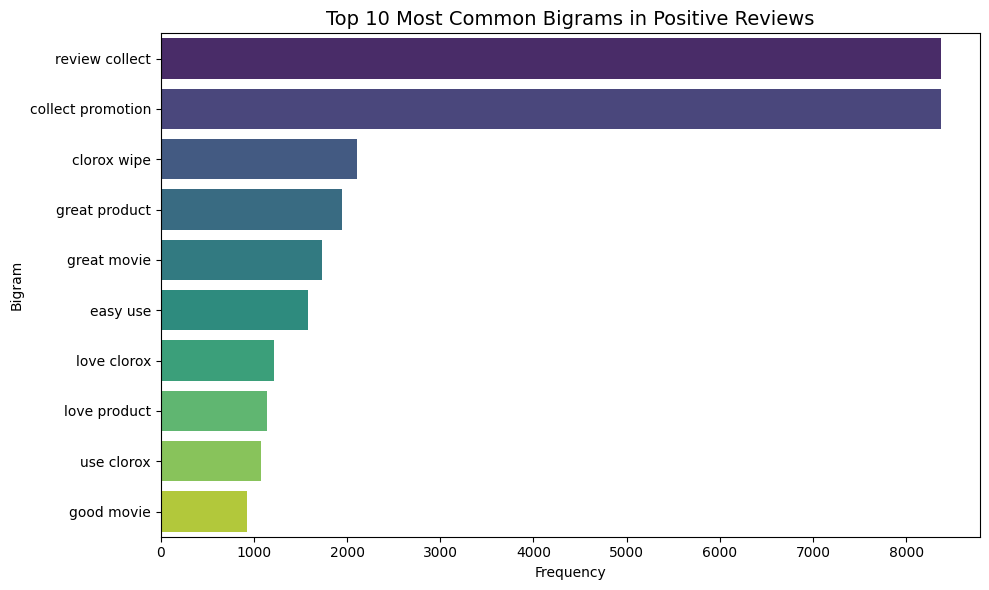

In [63]:
# Plotting a horizontal bar chart showing the top 10 most common bigrams in positive reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df_common_bigrams, palette='viridis')

plt.title('Top 10 Most Common Bigrams in Positive Reviews', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

In [64]:
# Getting top 10 bigrams from negative reviews
positive_reviews_common_bigrams = get_top_n_ngram(negative_reviews['reviews_cleaned'], 2, 10)

# Converting to DataFrame and label columns
df_common_bigrams = pd.DataFrame(positive_reviews_common_bigrams, columns=['Bigram', 'Frequency'])

print(df_common_bigrams)

                Bigram  Frequency
0          new formula        527
1          old formula        524
2            bring old        371
3       review collect        369
4    collect promotion        369
5           exxtra gel        205
6          use product        192
7  shampoo conditioner        163
8            make hair        144
9      receive product        131


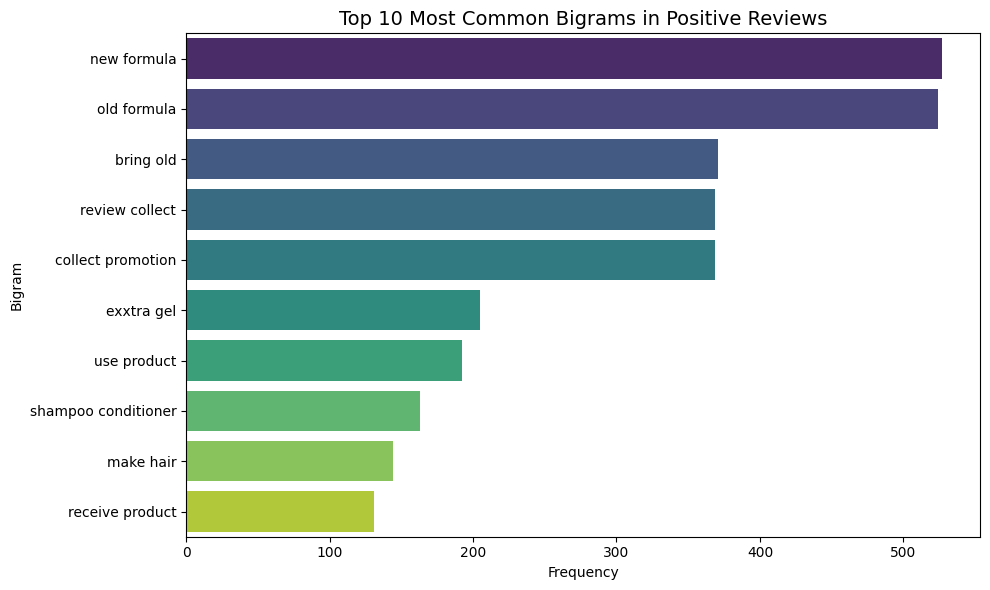

In [65]:
# Plotting a horizontal bar chart to visualize the top 10 most common bigrams in positive reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df_common_bigrams, palette='viridis')

plt.title('Top 10 Most Common Bigrams in Positive Reviews', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

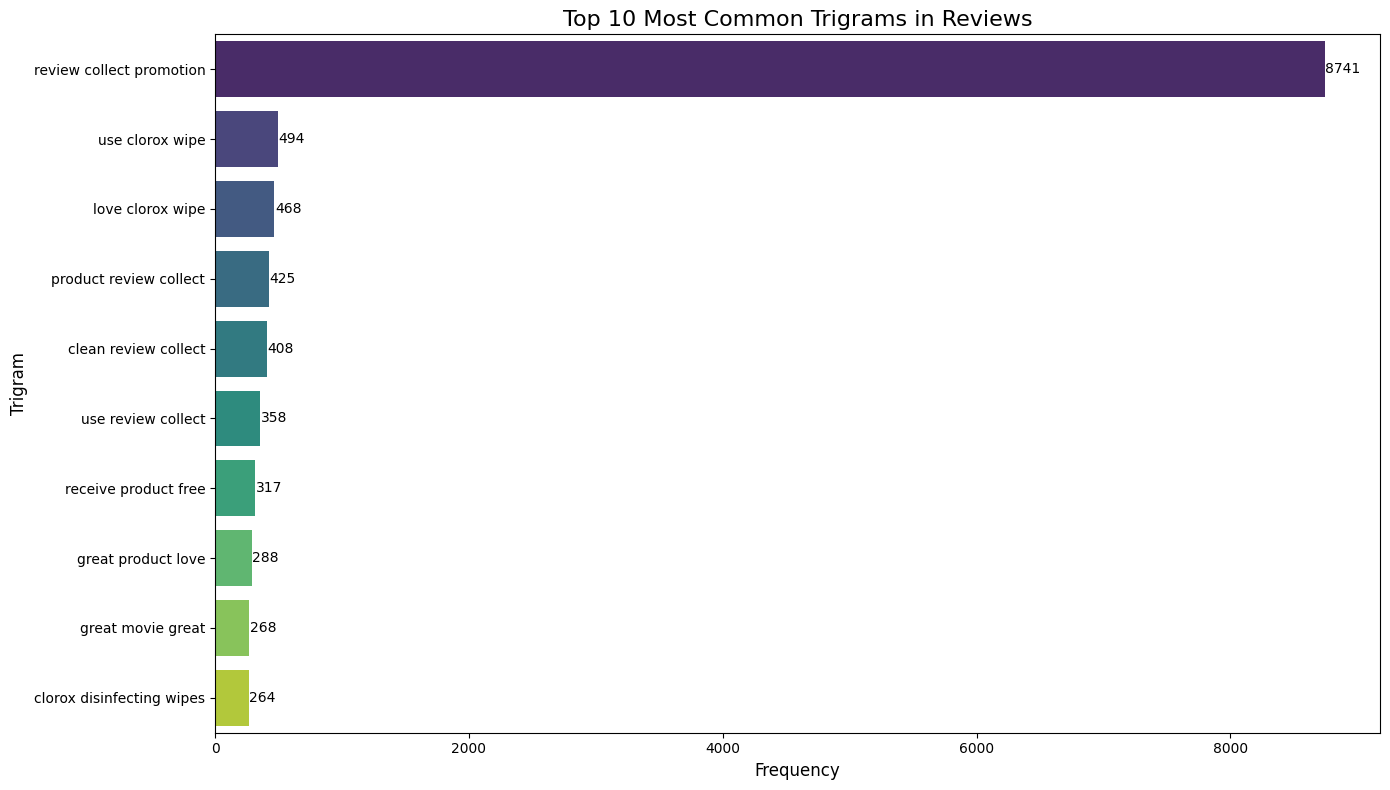

In [66]:
common_trigrams = get_top_n_ngram(data_sentiment['reviews_cleaned'], 3, 10)

# Converting to DataFrame
df_common_trigrams = pd.DataFrame(common_trigrams, columns=['Trigram', 'Frequency'])

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Trigram', data=df_common_trigrams, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Most Common Trigrams in Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding frequency labels on bars
for index, value in enumerate(df_common_trigrams['Frequency']):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### ***4. Feature Extraction***

In [67]:
# Using TF-IDF vectorizer using the parameters to get 3000 features.
stop_words_list = list(stop_words)

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_df=0.95, min_df=10, binary=False, 
                                   ngram_range=(1,2),max_features=3000)
X = tfidf_vectorizer.fit_transform(data_sentiment['reviews_cleaned'])

y= data_sentiment['user_sentiment']

### ***5. Sentiment Classification Models***

In [ ]:
# Splitting into Train and Test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [69]:
print("Train Set shape:", X_train.shape, y_train.shape)
print("Test Set shape:", X_test.shape, y_test.shape)

Train Set shape: (22452, 3000) (22452,)
Test Set shape: (7484, 3000) (7484,)


In [70]:
# Checking the data to see if there is a class imbalance in the data
data_sentiment['user_sentiment'].value_counts(normalize=True)

1    0.895277
0    0.104723
Name: user_sentiment, dtype: float64

In [71]:
counter = Counter(y_train)
print("Before handling imbalance", counter)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After handling imbalance", counter)

Before handling imbalance Counter({1: 20087, 0: 2365})
After handling imbalance Counter({1: 20087, 0: 20087})


In [ ]:
# Configuring logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        """
        Initialize ModelBuilder with the given model and dataset.
        """
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self):
        """
        Train the model and return predicted classes on the test set.
        """
        self.model.fit(self.x_train, self.y_train)
        return self.model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluate model performance using various metrics and plots.
        """
        results = self.evaluate_metrics(y_pred_class)

        print("\n" + "=" * 50)
        print("CLASSIFICATION REPORT")
        print("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        print("\n" + "=" * 50)
        print("CONFUSION MATRIX")
        print("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        print("\n" + "=" * 50)
        print("ROC CURVE")
        print("=" * 50 + "\n")
        self.plot_roc_curve()

        return results

    def evaluate_metrics(self, y_pred_class):
        """
        Compute and display classification metrics.
        """
        results = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # Checking if the model supports probability predictions
        if hasattr(self.model, "predict_proba"):
            y_pred_prob = self.model.predict_proba(self.x_test)[:, 1]
            results["ROC-AUC Score"] = metrics.roc_auc_score(self.y_test, y_pred_prob)
        else:
            results["ROC-AUC Score"] = None 

        # Printing results with proper spacing
        print("\n" + "=" * 50)
        print("MODEL PERFORMANCE METRICS")
        print("=" * 50)
        for metric, value in results.items():
            if value is not None:
                print(f"{metric}: {value * 100:.2f}%")
        print("=" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class):
        """
        Compute and visualize the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm / np.sum(cm), annot=True, cmap="Blues", fmt=".2%",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"]
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the ROC curve using RocCurveDisplay.
        """
        if hasattr(self.model, "predict_proba"):
            RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.show()
        else:
            print("\n[WARNING] ROC Curve cannot be plotted: Model does not support probability predictions.\n")

    def display_classification_report(self, y_pred_class):
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)

#### 1. Logistic Regression


MODEL PERFORMANCE METRICS
Accuracy: 91.11%
Precision: 97.52%
Recall: 92.45%
F1 Score: 94.92%
ROC-AUC Score: 93.51%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.55      0.79      0.65       770
           1       0.98      0.92      0.95      6714

    accuracy                           0.91      7484
   macro avg       0.76      0.86      0.80      7484
weighted avg       0.93      0.91      0.92      7484


CONFUSION MATRIX



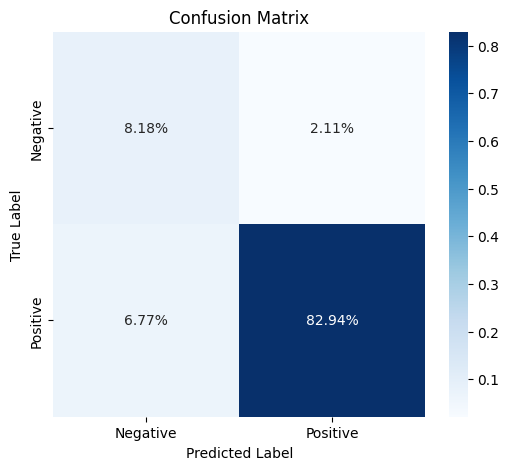


ROC CURVE



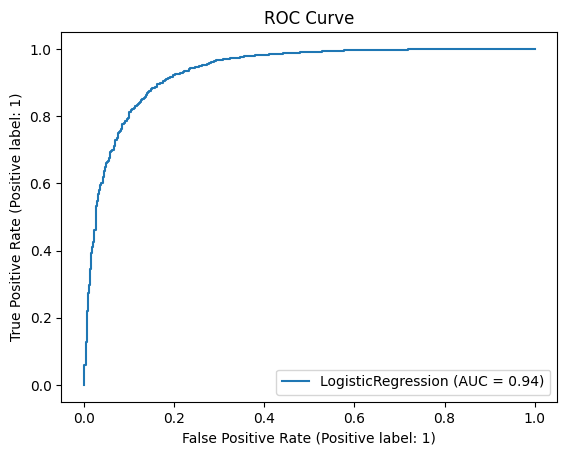

In [73]:
# Initializing model
model_lr = LogisticRegression()

# Creating ModelBuilder instance
builder_lr = ModelBuilder(model_lr, X_train_sm, X_test, y_train_sm, y_test)

# Training model
y_pred = builder_lr.train_model()

# Evaluating model
metrics_result_lr = builder_lr.evaluate_model(y_pred)

#### 2. Naive Bayes


MODEL PERFORMANCE METRICS
Accuracy: 84.74%
Precision: 97.84%
Recall: 84.87%
F1 Score: 90.89%
ROC-AUC Score: 92.01%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.39      0.84      0.53       770
           1       0.98      0.85      0.91      6714

    accuracy                           0.85      7484
   macro avg       0.68      0.84      0.72      7484
weighted avg       0.92      0.85      0.87      7484


CONFUSION MATRIX



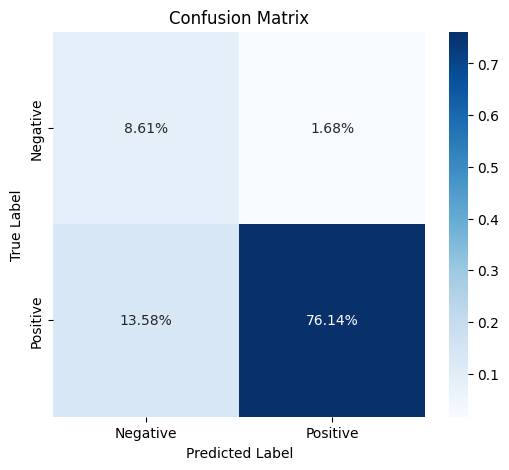


ROC CURVE



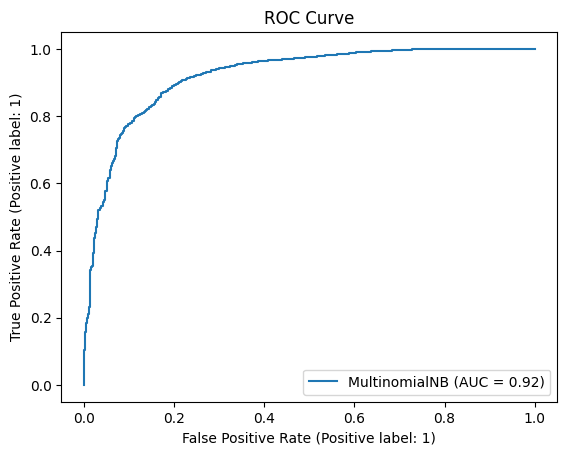

In [74]:
# Initializing model

model_nb = MultinomialNB(alpha=1.0)

# Creating ModelBuilder instance
builder_nb = ModelBuilder(model_nb, X_train_sm, X_test, y_train_sm, y_test)

# Training model
y_pred = builder_nb.train_model()

# Evaluating model
metrics_result_nb = builder_nb.evaluate_model(y_pred)

#### 3. Decision Trees


MODEL PERFORMANCE METRICS
Accuracy: 88.84%
Precision: 95.57%
Recall: 91.82%
F1 Score: 93.66%
ROC-AUC Score: 79.37%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.47      0.63      0.54       770
           1       0.96      0.92      0.94      6714

    accuracy                           0.89      7484
   macro avg       0.71      0.77      0.74      7484
weighted avg       0.91      0.89      0.90      7484


CONFUSION MATRIX



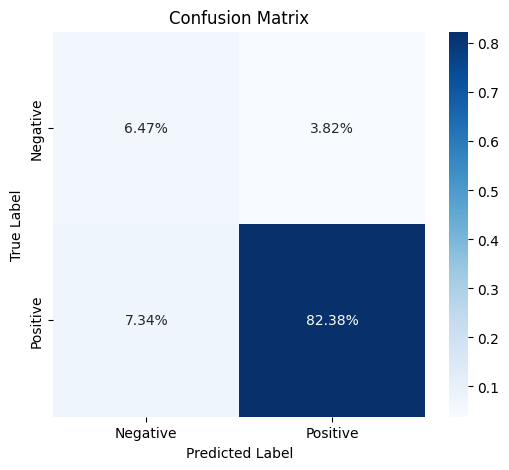


ROC CURVE



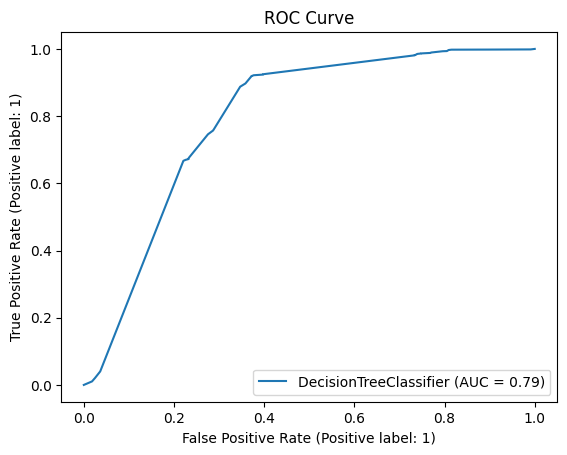

In [75]:
# Initializing model

model_dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

# Creating ModelBuilder instance
builder_dt = ModelBuilder(model_dt, X_train_sm, X_test, y_train_sm, y_test)

# Training model
y_pred = builder_dt.train_model()

# Evaluating model
metrics_result_dt = builder_dt.evaluate_model(y_pred)

#### 4. Random Forest


MODEL PERFORMANCE METRICS
Accuracy: 93.04%
Precision: 95.81%
Recall: 96.46%
F1 Score: 96.13%
ROC-AUC Score: 92.33%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       770
           1       0.96      0.96      0.96      6714

    accuracy                           0.93      7484
   macro avg       0.81      0.80      0.81      7484
weighted avg       0.93      0.93      0.93      7484


CONFUSION MATRIX



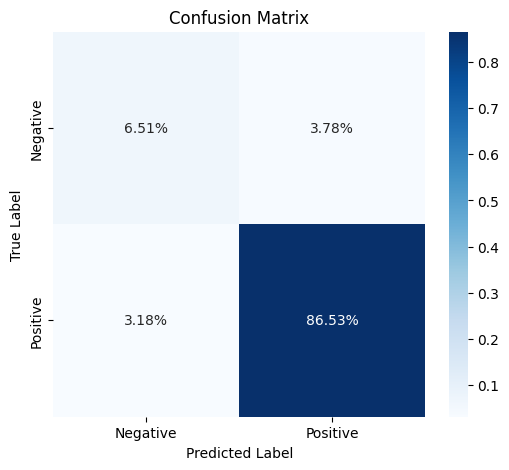


ROC CURVE



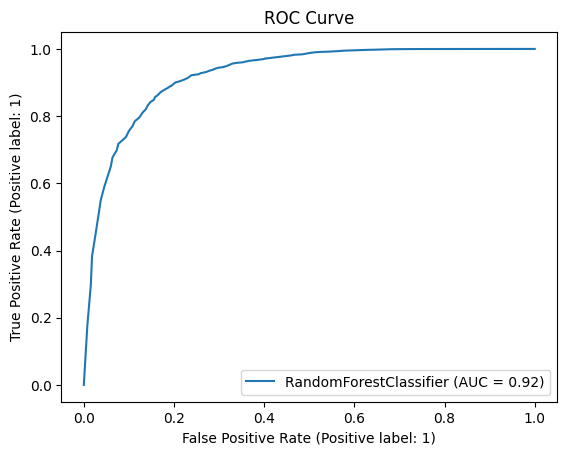

In [76]:
# Initializing model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating ModelBuilder instance
builder_rf = ModelBuilder(model_rf, X_train_sm, X_test, y_train_sm, y_test)

# Training model
y_pred = builder_rf.train_model()

# Evaluating model
metrics_result_rf = builder_rf.evaluate_model(y_pred)

#### 5. XG Boost


MODEL PERFORMANCE METRICS
Accuracy: 92.52%
Precision: 95.71%
Recall: 95.96%
F1 Score: 95.84%
ROC-AUC Score: 91.65%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       770
           1       0.96      0.96      0.96      6714

    accuracy                           0.93      7484
   macro avg       0.80      0.79      0.80      7484
weighted avg       0.92      0.93      0.92      7484


CONFUSION MATRIX



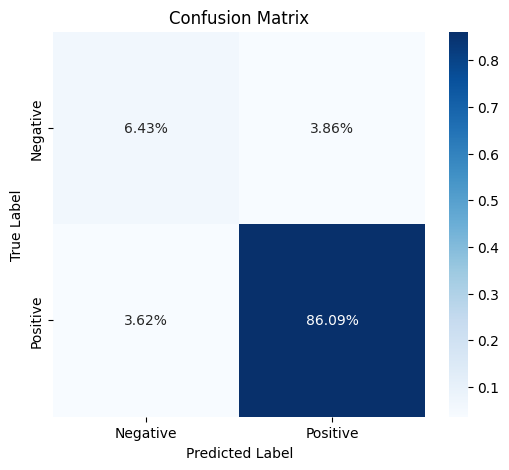


ROC CURVE



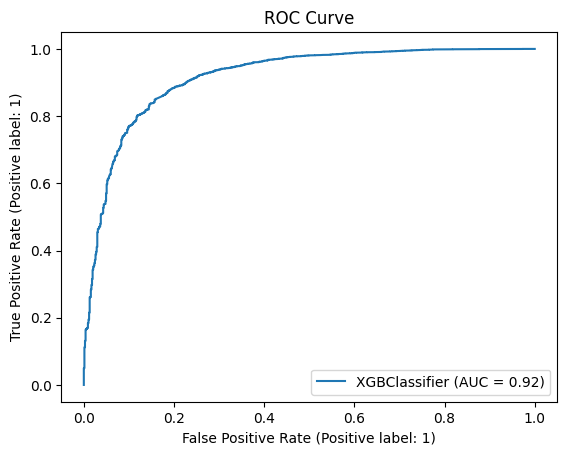

In [77]:
# Initializing model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Creating ModelBuilder instance
builder_xgb = ModelBuilder(model_xgb, X_train_sm, X_test, y_train_sm, y_test)

# Training model
y_pred = builder_xgb.train_model()

# Evaluating model
metrics_result_xgb = builder_xgb.evaluate_model(y_pred)

In [78]:
# Creating a table containing all model evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metrics_result_lr),
    'Naïve Bayes': pd.Series(metrics_result_nb),
    'Decision Tree': pd.Series(metrics_result_dt),
    'Random Forest': pd.Series(metrics_result_rf),
    'XGBoost': pd.Series(metrics_result_xgb)
}

# Converting to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Displaying the metrics table
df_metrics

,Metric,Logistic Regression,Naïve Bayes,Decision Tree,Random Forest,XGBoost
Accuracy,Accuracy,0.911144,0.847408,0.888429,0.930385,0.925174
Precision,Precision,0.975177,0.978365,0.955666,0.958130,0.957071
Recall,Recall,0.924486,0.848674,0.918231,0.964552,0.959637
F1 Score,F1 Score,0.949155,0.908917,0.936574,0.961330,0.958352
ROC-AUC Score,AUC Score,0.935075,0.920138,0.793699,0.923303,0.916513


### Model-wise Observations

- **Random Forest**  
  - **Best overall performance** with highest accuracy (**0.930**) and recall (**0.965**).  
  - Strong F1 score (**0.961**) ensures balanced precision and recall — crucial for capturing both positive and negative sentiments.  
  - Reliable choice for ensuring **comprehensive sentiment detection** in recommendations.

- **XGBoost**  
  - Very close to Random Forest in all metrics (accuracy: **0.925**, recall: **0.960**).  
  - Slightly lower ROC-AUC (**0.917**) but still robust for **ranking predictions** during recommendation filtering.

- **Logistic Regression**  
  - **Highest precision** (**0.975**) and best ROC-AUC (**0.935**), meaning fewer false positives in sentiment classification.  
  - Useful when recommendation quality depends more on **accuracy of positive sentiment detection** than on full recall.

- **Decision Tree**  
  - Moderate performance with decent recall (**0.918**), but lower ROC-AUC (**0.794**) indicates weaker ranking ability for sentiments.  
  - May not scale well for diverse sentiment patterns in a large review dataset.

- **Naïve Bayes**  
  - Lowest accuracy (**0.847**) and recall (**0.849**), meaning it may miss many relevant sentiments.  
  - Still offers high precision (**0.978**), making it suitable if speed and simplicity are prioritized over balanced detection.

### Key Takeaways for the Recommendation System

- **Random Forest** and **XGBoost** are the most reliable for balanced, high-quality sentiment detection, leading to better product filtering.  
- **Logistic Regression** can be chosen when reducing false positives is more important, even if some true positives are missed.  
- **Tree-based ensemble methods** adapt better to varied sentiment expressions than Naïve Bayes or a single Decision Tree.  
- **Hyperparameter tuning** is expected to further improve recall in Logistic Regression and ROC-AUC in XGBoost, boosting overall recommendation accuracy.

#### Hyper Parameter Tuning

- Next, we fine-tune the top 3 baseline models — **Logistic Regression**, **Random Forest**, and **XGBoost** — to optimize their performance.  
This process involves systematically searching for the best combination of model parameters (e.g., learning rate, tree depth, regularization strength) to maximize accuracy, precision, recall, and overall predictive capability.  
The tuned models are then compared to their baseline counterparts to confirm performance improvements before selecting the best final model.

In [79]:
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilderOptimized:
    def __init__(self, model, param_grid, x_train, x_test, y_train, y_test, model_name="Model"):
        self.model = model
        self.param_grid = param_grid
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.tuned_model = None
        self.model_name = model_name

    def tune_hyperparameters(self, n_iter=5):
        try:
            random_search = RandomizedSearchCV(
                self.model,
                self.param_grid,
                n_iter=n_iter,
                cv=5, 
                scoring='f1',
                n_jobs=-1,  
                random_state=42,
                verbose=1
            )
            random_search.fit(self.x_train, self.y_train)
            self.tuned_model = random_search.best_estimator_
            logging.info(f"Best Parameters: {random_search.best_params_}")
        except Exception as e:
            logging.error(f" Hyperparameter tuning failed: {e}")
        return self.tuned_model

    def train_and_evaluate(self, return_preds=False):
      """
      Trains the best model (after tuning) and evaluates it on the test data.

      Parameters:
      - return_preds (bool): If True, returns (metrics_dict, y_pred, y_pred_proba)

      Returns:
      - Dictionary of evaluation metrics. Optionally, also predictions.
      """
      if self.tuned_model is None:
          raise ValueError("You must run tune_hyperparameters() before training.")

      self.tuned_model.fit(self.x_train, self.y_train)
      y_pred = self.tuned_model.predict(self.x_test)

      try:
          y_pred_prob = self.tuned_model.predict_proba(self.x_test)[:, 1]
      except AttributeError:
          y_pred_prob = None 

      acc = accuracy_score(self.y_test, y_pred)
      prec = precision_score(self.y_test, y_pred)
      rec = recall_score(self.y_test, y_pred)
      f1 = f1_score(self.y_test, y_pred)
      roc_auc = roc_auc_score(self.y_test, y_pred_prob) if y_pred_prob is not None else None

      metrics_dict = {
          "Accuracy": acc,
          "Precision": prec,
          "Recall": rec,
          "F1 Score": f1,
          "ROC-AUC": roc_auc
      }

      self.metrics = metrics_dict

      if return_preds:
          return metrics_dict, y_pred, y_pred_prob
      return metrics_dict


    def _print_metrics(self, results):
        logging.info(f"\n{'='*50}\n{self.model_name}: Metrics\n{'='*50}")
        for k, v in results.items():
            if v is not None:
                logging.info(f"{k}: {v * 100:.2f}%")

    def _print_classification_report(self, y_pred):
        logging.info(f"\n{'='*50}\n{self.model_name}: Classification Report\n{'='*50}")
        logging.info(classification_report(self.y_test, y_pred))

In [80]:
def display_full_evaluation(y_true, y_pred, y_pred_prob=None, model_name="Model", show_plots=True):
    print(f"{'='*50}")
    print(f"{model_name.upper()} PERFORMANCE METRICS")
    print(f"{'='*50}")

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob) if y_pred_prob is not None else None

    print(f"Accuracy       : {acc * 100:.2f}%")
    print(f"Precision      : {prec * 100:.2f}%")
    print(f"Recall         : {rec * 100:.2f}%")
    print(f"F1 Score       : {f1 * 100:.2f}%")
    if roc_auc is not None:
        print(f"ROC-AUC Score  : {roc_auc * 100:.2f}%")
    print(f"{'='*50}")

    # Classification report
    print(f"\n{model_name} - Classification Report\n{'-'*40}")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix (as percentage)
    if show_plots:
        cm = confusion_matrix(y_true, y_pred)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues",
                    xticklabels=["Pred 0", "Pred 1"],
                    yticklabels=["Actual 0", "Actual 1"])
        plt.title(f"{model_name} - Confusion Matrix (%)")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.tight_layout()
        plt.show()

        # ROC Curve
        if y_pred_prob is not None:
            RocCurveDisplay.from_predictions(y_true, y_pred_prob)
            plt.title(f"{model_name} - ROC Curve")
            plt.tight_layout()
            plt.show()

#### 1. Logistic Regression (Hyper Parameter Tuning)

In [81]:
model_lr = LogisticRegression(random_state=42, solver='liblinear')
param_grid = {
    "C": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "penalty": ["l1", "l2"]
}

model_builder_lr = ModelBuilderOptimized(
    model_lr, param_grid,
    X_train_sm, X_test,
    y_train_sm, y_test,
    model_name="Logistic Regression Tuned Model"
)

#  Hyperparameter Tuning
tuned_model_lr = model_builder_lr.tune_hyperparameters(n_iter=50)

#  Train and Evaluate
metric_result_lr, y_pred_lr, y_pred_prob_lr = model_builder_lr.train_and_evaluate(return_preds=True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Parameters: {'penalty': 'l2', 'C': 100}


LOGISTIC REGRESSION TUNED MODEL PERFORMANCE METRICS
Accuracy       : 90.91%
Precision      : 96.63%
Recall         : 93.12%
F1 Score       : 94.84%
ROC-AUC Score  : 91.11%

Logistic Regression Tuned Model - Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.72      0.62       770
           1       0.97      0.93      0.95      6714

    accuracy                           0.91      7484
   macro avg       0.76      0.82      0.78      7484
weighted avg       0.92      0.91      0.91      7484



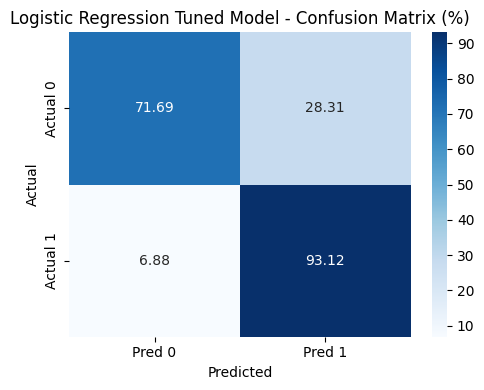

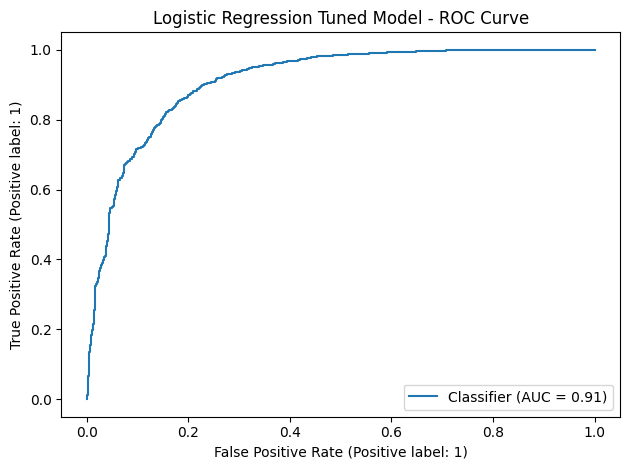

In [82]:
display_full_evaluation(
    y_true=y_test,
    y_pred=y_pred_lr,
    y_pred_prob=y_pred_prob_lr,
    model_name="Logistic Regression Tuned Model",
    show_plots=True 
)

#### 2. Random Forest (Hyper Parameter Tuning)

In [83]:
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "bootstrap": [True, False],
    "class_weight": ['balanced']
}

# Wrapping in your model builder
model_builder_rf = ModelBuilderOptimized(
    model_rf, param_grid_rf,
    X_train_sm, X_test,
    y_train_sm, y_test,
    model_name="Random Forest Tuned Model"
)

#  Hyper Parameter Tuning
tuned_model_rf = model_builder_rf.tune_hyperparameters(n_iter=50)

#  Train and evaluate

metric_result_rf, y_pred_rf, y_pred_prob_rf = model_builder_rf.train_and_evaluate(return_preds=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}


RANDOM FOREST TUNED MODEL PERFORMANCE METRICS
Accuracy       : 93.63%
Precision      : 94.42%
Recall         : 98.73%
F1 Score       : 96.53%
ROC-AUC Score  : 92.81%

Random Forest Tuned Model - Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.49      0.61       770
           1       0.94      0.99      0.97      6714

    accuracy                           0.94      7484
   macro avg       0.88      0.74      0.79      7484
weighted avg       0.93      0.94      0.93      7484



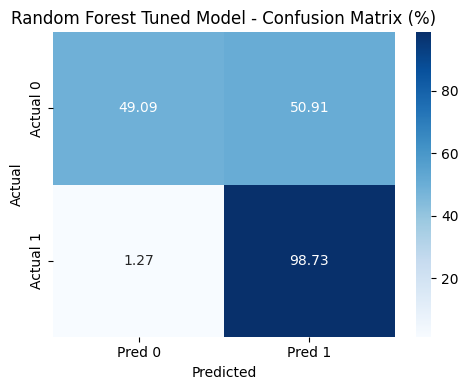

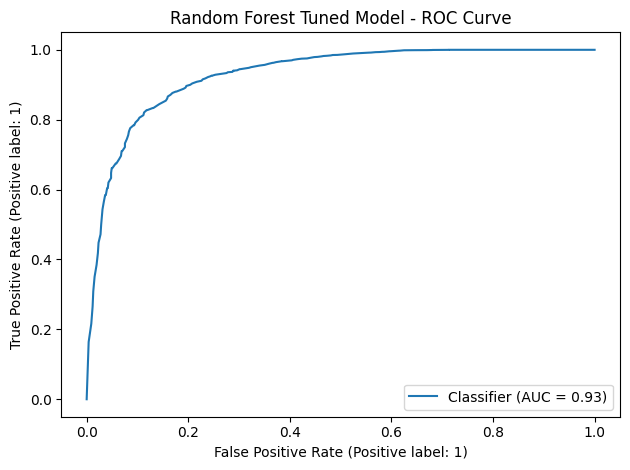

In [84]:
display_full_evaluation(
    y_true=y_test,
    y_pred=y_pred_rf,
    y_pred_prob=y_pred_prob_rf,
    model_name="Random Forest Tuned Model",
    show_plots=True 
)

#### 3. XG Boost (Hyper Parameter Tuning)

In [85]:
# Defining XGBoost model and parameter grid
model_xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0],
    "gamma": [0, 0.1, 0.3],
    "min_child_weight": [1, 3, 5],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 1.5, 2]
}

# Wrapping in your model builder
model_builder_xgb = ModelBuilderOptimized(
    model_xgb, param_grid_xgb,
    X_train_sm, X_test,
    y_train_sm, y_test,
    model_name="XGBoost Tuned Model"
)

# Hyper Parameter Tuning
tuned_model_xgb = model_builder_xgb.tune_hyperparameters(n_iter=50)

#  Train and evaluate
metric_result_xgb, y_pred_xgb, y_pred_prob_xgb = model_builder_xgb.train_and_evaluate(return_preds=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Parameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}


XGBOOST TUNED MODEL PERFORMANCE METRICS
Accuracy       : 92.10%
Precision      : 95.77%
Recall         : 95.41%
F1 Score       : 95.59%
ROC-AUC Score  : 91.68%

XGBoost Tuned Model - Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       770
           1       0.96      0.95      0.96      6714

    accuracy                           0.92      7484
   macro avg       0.79      0.79      0.79      7484
weighted avg       0.92      0.92      0.92      7484



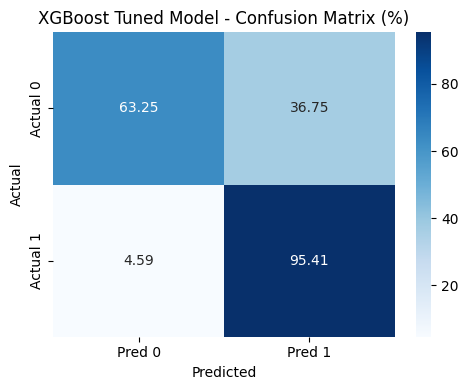

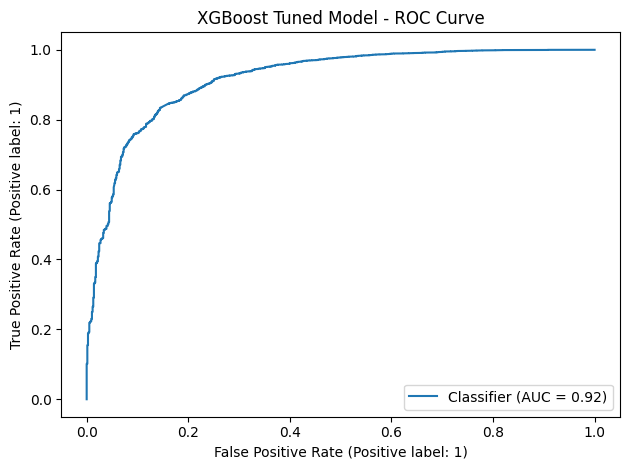

In [86]:
#  Display evaluation
display_full_evaluation(
    y_true=y_test,
    y_pred=y_pred_xgb,
    y_pred_prob=y_pred_prob_xgb,
    model_name="XGBoost Tuned Model",
    show_plots=True 
)

In [87]:
df_metrics = pd.DataFrame({
    'Logistic Regression Tuned': metric_result_lr,
    'Random Forest Tuned': metric_result_rf,
    'XGBoost Tuned': metric_result_xgb
})

# Reset index to move metric names into the first column
df_metrics = df_metrics.reset_index()
df_metrics.columns = ['Metric', 'Logistic Regression Tuned', 'Random Forest Tuned', 'XGBoost Tuned']

# Displaying the final table
df_metrics

,Metric,Logistic Regression Tuned,Random Forest Tuned,XGBoost Tuned
0,Accuracy,0.909139,0.936264,0.921032
1,Precision,0.966306,0.944167,0.957692
2,Recall,0.931189,0.987340,0.954126
3,F1 Score,0.948422,0.965271,0.955905
4,ROC-AUC,0.911146,0.928070,0.916844


### Observations
- **Random Forest (Tuned)**  
  - Achieved the **highest accuracy** (0.9363), **recall** (0.9873), and **F1 score** (0.9653).  
  - Strong ROC-AUC (0.9281) indicates reliable ranking ability in distinguishing positive and negative sentiments.  
  - Particularly effective at **capturing the maximum number of true positive sentiments**, which is crucial for ensuring no positive sentiment is missed in recommendations.

- **XGBoost (Tuned)**  
  - Solid overall performance with balanced precision (0.9577) and recall (0.9541).  
  - Accuracy (0.9210) slightly behind Random Forest.  
  - Still a strong choice when interpretability of feature importance and model efficiency are desired.

- **Logistic Regression (Tuned)**  
  - Highest precision (0.9663), meaning it produces the **fewest false positives**.  
  - Lower recall (0.9312) than the other two models, which could result in **missing some positive sentiments**.  
  - Simpler and faster to train, but slightly less effective in overall sentiment coverage.

### Best Model Selection
**Random Forest (Tuned)** is the **best-performing model** for predicting sentiments in this project due to:
- Highest overall accuracy, recall, and F1 score.
- Strong ROC-AUC, ensuring robust discrimination between sentiment classes.
- Its ability to **maximize positive sentiment detection**, directly enhancing the quality and completeness of the product recommendation list.

**Final Choice:** **Random Forest (Tuned)**

In [88]:
# Creating the function for saving the pickle files in a particular format
def save_ML_model(obj, filename):
    filename = "pickle/"+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [89]:
# Saving Models Before Hyperparameter Tuning
save_ML_model(model_lr, 'logistic-regression-base-model')
save_ML_model(model_nb, 'naive-bayes-model')
save_ML_model(model_dt, 'decision-tree-model')
save_ML_model(model_rf, 'random-forest-base-model')
save_ML_model(model_xgb, 'xg-boost-base-model')

In [90]:
# Saving Models After Hyperparameter Tuning
save_ML_model(tuned_model_lr, 'logistic-regression-tuned-model')
save_ML_model(tuned_model_rf, 'random-forest-tuned-model')
save_ML_model(tuned_model_xgb, 'xg-boost-tuned-model')

In [91]:
def save_best_model(obj, filename):
    filename = "models/"+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [92]:
# Saving all the final and best models
save_best_model(data_sentiment, 'cleaned_data')
save_best_model(tfidf_vectorizer, 'tfidf')
save_best_model(tuned_model_rf, 'best_sentiment_model')

### ***6. Recommendation Systems***

We will build the below two recommendation systems

User-based recommendation system
Item-based recommendation system
Once built, we will analyze the recommendation systems and select the one that is best suited in this case. Once we get the best-suited recommendation system, the next task will be to recommend 20 products that a user is most likely to purchase based on the ratings.

In [93]:
# Importing dataset
data_recommendation = pd.read_csv("data/sample30.csv")
data_recommendation.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [94]:
# Checking the shape of the dataframe
data_recommendation.shape

(30000, 15)

In [95]:
# Checking the  summary info about the data_recommendation DataFrame
data_recommendation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [96]:
# We need only the below columns for building a recommendation system
data_recommendation = data_recommendation[["id", "name", "reviews_rating", "reviews_username"]]

In [97]:
# Getting total number of NULL values and percentage of the columns
null_count = data_recommendation[data_recommendation.columns[data_recommendation.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (data_recommendation[data_recommendation.columns[data_recommendation.isna().any()]].isna().sum() * 100 / data_recommendation.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
reviews_username,63,0.21


In [98]:
# Removing the rows where reviews_username is NULL
data_recommendation = data_recommendation[~ data_recommendation.reviews_username.isna() ]

In [99]:
data_recommendation.shape

(29937, 4)

In [100]:
# Getting total number of NULL values and percentage of the columns
null_count = data_recommendation[data_recommendation.columns[data_recommendation.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (data_recommendation[data_recommendation.columns[data_recommendation.isna().any()]].isna().sum() * 100 / data_recommendation.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


### Train Test Split

In [101]:
# Splitting the data into train and test
train, test = train_test_split(data_recommendation, test_size=0.30, random_state=42)

In [102]:
print(train.shape)
print(test.shape)

(20955, 4)
(8982, 4)


In [103]:
# Pivoting the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset

In [104]:
# Copying the train dataset into dummy_train
dummy_train = train.copy()

In [105]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [106]:
# Converting the dummy train dataset into matrix format
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User Similarity Matrix

In [107]:
# Pivoting the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [108]:
# For verification purpose, we do have cases where the rating is not NaN
df_pivot[~df_pivot['AV13O1A8GV-KLJ3akUyj'].isna()]

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
joshua,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Normalizing ratings by subtracting each user's mean rating 
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [110]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [111]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [112]:
user_correlation.shape

(18275, 18275)

### Prediction - User User

In [113]:
# Replacing negative user correlation values with zero
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
# Predicting ratings using dot product of user correlation matrix and item-user rating matrix
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46525748, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [115]:
user_predicted_ratings.shape

(18275, 256)

In [116]:
# Masking predicted user-based ratings with dummy_train to keep only valid training set entries
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.596262,0.0,0.0,0.0,0.0,2.581989,1.018079,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.465257,1.889822,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000



### Finding the Top 20 products that a user is most likely to purchase based on the ratings (user-user based recommendation)

In [117]:
# Taking a sample username as input.
user_input = '08dallas'
print(user_input)

08dallas


In [118]:
# Getting top 20 user-based recommendations with similarity scores
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AV13O1A8GV-KLJ3akUyj,0.0
1,AV14LG0R-jtxr-f38QfS,0.0
2,AVpfM_ytilAPnD_xXIJb,0.0
3,AVpfMpZ51cnluZ0-f_L9,0.0
4,AVpfN6Z71cnluZ0-gZmO,0.0
5,AVpfNVsj1cnluZ0-gNQN,0.0
6,AVpfNWbPilAPnD_xXPR7,0.0
7,AVpfNc9cLJeJML434tza,0.0
8,AVpfNfEMLJeJML434uf-,0.0
9,AVpfNglu1cnluZ0-gQ7x,0.0


In [119]:
# Merging and sorting top 20 user-based recommendations by similarity score
top20_rec = pd.merge(data_recommendation, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),0.0
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,0.0
18,AVpfPPkEilAPnD_xX3cP,Aveeno Baby Continuous Protection Lotion Sunsc...,0.0
17,AVpfPKzxLJeJML435SYL,Tim Holtz Retractable Craft Pick-Red 6x.5,0.0
16,AVpfPjqKLJeJML435aZR,Voortman Sugar Free Fudge Chocolate Chip Cookies,0.0
15,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.0
14,AVpfOrD0ilAPnD_xXrRj,Progresso Traditional Chicken Rice With Vegeta...,0.0
13,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,0.0
12,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),0.0
11,AVpfOfIqLJeJML435D06,Solo Foods Poppy Seed Cake and Pastry Filling,0.0


### Evaluation - User User


In [120]:
train.head()

,id,name,reviews_rating,reviews_username
962,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,5,brittney w
10463,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,cjshrad
25385,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,zman69
27096,AVpfrFDZLJeJML43Bmv0,Meguiar's Ultimate Quik Detailer 22-Oz.,5,misunshyne
24007,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4,matanovatos


In [121]:
# Finding out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2051, 4)

In [122]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar
29216,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,4,baronesscountess


In [123]:
# Converting into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [124]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# Converting the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [126]:
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# Setting 'userId' as the index for the user correlation matrix
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
userId,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar
29216,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,4,baronesscountess


In [130]:
# Setting user correlation matrix column names and filter rows to keep only users in list_name
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [131]:
user_correlation_df_1.shape

(1693, 18275)

In [132]:
# Filtering transposed user correlation matrix to keep only users/items in list_name
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [133]:
# Transposing filtered user correlation matrix back to original orientation
user_correlation_df_3 = user_correlation_df_2.T

In [134]:
user_correlation_df_3.head()

,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,...,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
userId,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
user_correlation_df_3.shape

(1693, 1693)

In [136]:
# Replacing negative correlations with zero, then compute predicted ratings using dot product
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar
29216,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,4,baronesscountess


In [138]:
# Creating dummy test dataframe
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [139]:
dummy_test.shape

(1693, 140)

In [140]:
# Masking predicted ratings with dummy_test to keep only test set entries
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [141]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Scaling predicted ratings > 0 to range 1-5 using MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [143]:
# Creating user-item rating matrix from 'common' DataFrame
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [144]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [145]:
# Calculating and printing RMSE between predicted and actual user-based ratings
rmse_user_user = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_user_user)

2.551419404666111


### Using Item Similarity

In [ ]:
# Creating item-user rating matrix with products as rows and users as columns
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

In [147]:
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Subtracting user mean ratings from df_pivot for normalization
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [149]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [151]:
# Replacing negative item correlation values with zero
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - Item Item

In [152]:
# Predicting ratings using dot product of user-item matrix and item correlation matrix
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [153]:
item_predicted_ratings.shape

(18275, 256)

In [154]:
dummy_train.shape

(18275, 256)

#### Filtering the rating only for the products not rated by the user for recommendation

In [155]:
# Masking predicted ratings with dummy_train to keep only valid entries
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.006042,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.020509,0.006039,0.064856,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.097645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.162741,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.130193,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000082,0.0,0.0,0.0,0.001244,0.002197,0.001808,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.006084,0.000000,0.000000,0.009456


In [156]:
# Take a sample username as input.
user_input = '08dallas'
print(user_input)

08dallas


In [157]:
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.006042,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.020509,0.006039,0.064856,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.097645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.162741,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.130193,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000082,0.0,0.0,0.0,0.001244,0.002197,0.001808,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.006084,0.000000,0.000000,0.009456


In [158]:
# Getting top 20 item-based recommendations with similarity scores
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpfE7puilAPnD_xUcCW,0.537181
1,AVpe9W4D1cnluZ0-avf0,0.147323
2,AVpfPaoqLJeJML435Xk9,0.052591
3,AVpe41TqilAPnD_xQH3d,0.049444
4,AVpe59io1cnluZ0-ZgDU,0.044441
5,AVpf7I3i1cnluZ0-tnL6,0.044029
6,AVpe8xjUilAPnD_xRkxC,0.036440
7,AVpe7GIELJeJML43yZfu,0.036288
8,AVpfBrUZilAPnD_xTUly,0.011334
9,AV1l8zRZvKc47QAVhnAv,0.005924


### Finding the Top 20 products that a user is most likely to purchase based on the ratings (item-item based recommendation)

In [159]:
# Merging and sorting top 20 item-based recommendations by similarity score
top20_item_rec = pd.merge(data_recommendation, df_top20_item_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_item_rec.reset_index(drop=True, inplace=True)
top20_item_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
8,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.537181
5,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,0.147323
15,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.052591
1,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.049444
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,0.044441
6,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,0.044029
4,AVpe8xjUilAPnD_xRkxC,The Honest Company Laundry Detergent,0.036440
3,AVpe7GIELJeJML43yZfu,Eagle Fat Free Sweetened Condensed Milk,0.036288
7,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",0.011334
0,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,0.005924


### Evaluation - Item Item

In [160]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [ ]:
# Finding out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(8966, 4)

In [162]:
common.head()

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica


In [ ]:
# Creating item-user rating matrix with products as rows and users as columns
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [164]:
common_item_based_matrix.shape

(195, 8318)

In [165]:
# Creating a DataFrame from the item correlation matrix
item_correlation_df = pd.DataFrame(item_correlation)

In [166]:
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Setting 'movieId' as the index for the item correlation matrix
item_correlation_df['movieId'] = df_subtracted.index
item_correlation_df.set_index('movieId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
movieId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# Creating a list of product IDs from the 'id' column in 'common'
list_name = common.id.tolist()

In [ ]:
# Filtering item correlation matrix to keep only items in list_name
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [170]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
movieId,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.108098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Replacing negative correlations with zero, then computing predicted ratings using dot product
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34691174e-02, 3.00000000e+00, 6.62104097e-03, ...,
        0.00000000e+00, 5.16904870e-03, 8.22214474e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.45559849e-03]])

In [172]:
common_item_predicted_ratings.shape

(195, 8318)

In [173]:
common.head()

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica


In [174]:
# Dummy test will be used for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [175]:
# Pivot 'common' to create a matrix with products as rows and users as columns, filled with ratings
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [176]:
# Scaling predicted ratings to range 1-5 using MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [177]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [178]:
# Calculating and printing the RMSE between predicted and actual values
rmse_item_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item_item)

3.5497841991528967


In [179]:
# Recommended model evaluation
if rmse_user_user < rmse_item_item:
  print("Best-fit model is user-user recommendation system")
else:
  print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


### Recommendation System Evaluation

Two collaborative filtering approaches were implemented and compared:

1. **User–User Collaborative Filtering**  
   - Recommends products to a user based on preferences of similar users.
   - Works well when there is significant overlap in user ratings and behavior patterns.

2. **Item–Item Collaborative Filtering**  
   - Recommends products similar to those a user has already liked or purchased.
   - Generally more stable over time as item similarities change less frequently than user similarities.

#### Evaluation Metric — RMSE (Root Mean Squared Error)
- RMSE measures the average difference between predicted ratings and actual ratings.  
- **Lower RMSE = better predictive accuracy**.

| Model Type         | RMSE   |
|--------------------|--------|
| User–User          | **2.5514** |
| Item–Item          | 3.5498 |

#### Model Selection
- The **User–User Collaborative Filtering** model achieved the **lowest RMSE** (2.5514), significantly outperforming the Item–Item model (3.5498).  
- This indicates that the User–User approach predicts user preferences more accurately for this dataset.

#### Reason for Selection
- **Better personalization**: By leveraging the preferences of similar users, the system can recommend products that align more closely with the target user’s tastes.  
- **Higher accuracy**: The lower RMSE means fewer errors in rating predictions, leading to more relevant recommendations.  
- **Stronger alignment with data characteristics**: The dataset contains sufficient user rating overlap to make similarity-based matching effective.

**Final Choice:** **User–User Collaborative Filtering**

### Top 20 Product recommendations to the user by the best recommendation model (user-user based recommendation system)

In [180]:
# Take a sample username as input
user_input = 'evrydayhustla420'

In [181]:
# Get top 20 recommended products with similarity scores
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfRTh1ilAPnD_xYic2,16.870920
1,AVpe41TqilAPnD_xQH3d,13.017496
2,AVpf0eb2LJeJML43EVSt,11.843501
3,AVpf3VOfilAPnD_xjpun,9.609059
4,AVpe59io1cnluZ0-ZgDU,7.706569
5,AVpfJP1C1cnluZ0-e3Xy,5.474655
6,AVpfOIrkilAPnD_xXgDG,4.809401
7,AVpfPnrU1cnluZ0-g9rL,4.539020
8,AVpe31o71cnluZ0-YrSD,4.336229
9,AVpe8gsILJeJML43y6Ed,4.309060


In [182]:
# Merge and sort top 20 recommended products by similarity score
top20_rec = pd.merge(data_sentiment, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
18,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,16.870920
1,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),13.017496
5,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),11.843501
8,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,9.609059
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,7.706569
12,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5.474655
15,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),4.809401
17,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's C...,4.539020
0,AVpe31o71cnluZ0-YrSD,Dark Shadows (includes Digital Copy) (ultravio...,4.336229
3,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",4.309060


In [183]:
user_final_rating.shape

(18275, 256)

In [184]:
# Checking the top 5 records in final recommendation model 
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.596262,0.0,0.0,0.0,0.0,2.581989,1.018079,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.465257,1.889822,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [185]:
# Saving the best recommendation model as pickle file
save_best_model(user_final_rating, 'best_recommendation_model')

### ***7. Fine-Tuning the Recommendation System and Recommendation of Top 5 Products***

In [186]:
def get_sentiment_recommendations(user):
    # Loading recommendation matrix (user-product ratings)
    with open("models/best_recommendation_model.pkl", "rb") as f:
        user_final_rating = pickle.load(f)
    
    # Loading TF-IDF vectorizer for reviews
    with open("models/tfidf.pkl", "rb") as f:
        tfidf_vectorizer = pickle.load(f)
        
    # Loading the best sentiment classification model
    with open("models/best_sentiment_model.pkl", "rb") as f:
        xgb = pickle.load(f)
        
    # Loading cleaned review dataset with product info and processed text
    df_clean = pd.read_pickle("models/cleaned_data.pkl")

    # Validating if user exists
    if user not in user_final_rating.index:
        print(f"User '{user}' not found in recommendation matrix.")
        return None

    # Getting top 20 recommended product IDs for the user (change 5 to 20 if needed)
    top_product_ids = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)

    # Filtering reviews for those top 20 products
    reviews_top_products = df_clean[df_clean['id'].isin(top_product_ids)].copy()

    # Vectorizing cleaned reviews using TF-IDF
    X_reviews = tfidf_vectorizer.transform(reviews_top_products["reviews_cleaned"].astype(str))

    # Predicting sentiment (1 = positive, 0 = negative)
    reviews_top_products["predicted_sentiment"] = xgb.predict(X_reviews)

    # Keeping only required columns
    sentiment_df = reviews_top_products[['name', 'predicted_sentiment']]

    # Grouping by product name and calculate sentiment statistics
    sentiment_summary = sentiment_df.groupby('name', as_index=False).count()
    sentiment_summary.rename(columns={'predicted_sentiment': 'total_reviews'}, inplace=True)

    sentiment_summary["predicted_positive_reviews"] = sentiment_summary['name'].apply(
        lambda product: sentiment_df[(sentiment_df['name'] == product) & 
                                     (sentiment_df['predicted_sentiment'] == 1)]["predicted_sentiment"].count()
    )

    sentiment_summary['positive_sentiment_percent'] = np.round(
        (sentiment_summary["predicted_positive_reviews"] / sentiment_summary["total_reviews"]) * 100, 2
    )

    # Sorting and returning products with highest positive sentiment percentage
    return sentiment_summary.sort_values('positive_sentiment_percent', ascending=False)

In [187]:
# Taking a user name as input for getting recommendations
user = '00sab00'
get_sentiment_recommendations(user)

,name,total_reviews,predicted_positive_reviews,positive_sentiment_percent
6,Clorox Disinfecting Wipes Value Pack Scented 1...,8525,8447,99.09
5,Clorox Disinfecting Bathroom Cleaner,2039,2011,98.63
0,100:Complete First Season (blu-Ray),139,136,97.84
15,Red (special Edition) (dvdvideo),672,652,97.02
17,The Resident Evil Collection 5 Discs (blu-Ray),845,817,96.69
14,Planes: Fire Rescue (2 Discs) (includes Digita...,1142,1101,96.41
10,Jason Aldean - They Don't Know,204,196,96.08
2,Bisquick Original Pancake And Baking Mix - 40oz,97,93,95.88
3,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",68,65,95.59
16,Stargate (ws) (ultimate Edition) (director's C...,186,177,95.16


In [188]:
# Getting the top 5 recommendations based on postive sentiment percentage
recommendations = get_sentiment_recommendations(user)  
recommendations.head()

,name,total_reviews,predicted_positive_reviews,positive_sentiment_percent
6,Clorox Disinfecting Wipes Value Pack Scented 1...,8525,8447,99.09
5,Clorox Disinfecting Bathroom Cleaner,2039,2011,98.63
0,100:Complete First Season (blu-Ray),139,136,97.84
15,Red (special Edition) (dvdvideo),672,652,97.02
17,The Resident Evil Collection 5 Discs (blu-Ray),845,817,96.69


### ***8. Conclusion and Insights***

- Successfully developed an **end-to-end sentiment-based product recommendation system** for the e-commerce platform **Ebuss**, combining **User–User Collaborative Filtering** with a **Random Forest sentiment classifier** to ensure only relevant, positively perceived products are recommended.
- Processed **30,000+ reviews** and conducted **EDA** to uncover sentiment distribution, brand performance, and reviewer activity trends.
- Implemented robust **text preprocessing** (cleaning, stopword removal, lemmatization) and **TF-IDF vectorization** for feature extraction.
- Trained and evaluated multiple ML models (**Logistic Regression, Naive Bayes, Decision Tree, Random Forest, XGBoost, Logistic Regression Tuned, Random Forest Tuned and XGBoost Tuned**), selecting the **Random Forest (Tuned)** as the best sentiment classifier due to:
  - **Accuracy:** 0.9363
  - **Recall:** 0.9873
  - **F1-score:** 0.9653
  - **ROC-AUC:** 0.9281
  - Best at capturing maximum positive sentiments without missing them.
- For the recommendation engine, evaluated **User–User Collaborative Filtering** vs **Item–Item Collaborative Filtering**:
  - **User–User RMSE:** 2.5514 (**better**)
  - **Item–Item RMSE:** 3.5498
  - Chose **User–User** for higher personalization and better predictive accuracy.
- Designed a **two-stage pipeline**:
  1. Generate top 20 products via User–User CF.
  2. Filter to top 5 with the highest positive sentiment percentage from the Random Forest Tuned model.
- Integrated into a **Flask web application** with a Bootstrap-based UI for real-time, user-specific recommendations.

---

#### We can run this Project locally
1. Open **Anaconda Prompt**.  
2. Navigate to your project folder using: `cd path\to\your\project`  
3. Run the Flask application: `python app.py`  
4. Open your browser and visit: `http://127.0.0.1:5000`  
5. Enter a valid username (from the dataset) to view personalized recommendations.